In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from market import IntegratedMarketModel

In [14]:
n_firms = 10 
n_consumers = 500
n_chars = 2
T = 1
s = 100

In [15]:
model = IntegratedMarketModel(
        n_firms, 
        n_consumers, 
        n_chars, 
        T, 
        seed=s
    )
model.demand_side_optimisation()


In [16]:
vp1 = model.v_p[:,0]
print(vp1.shape)
price1 = model.prices[:,0]

e=0 


market_shares, all_probs, mean_indirect_utility = model.compute_share(vp1, price1, e)
J_true = model.construct_Jacobian(all_probs, vp1)
print(J_true)
print(all_probs)

(500,)
[[-0.02518505  0.00048646  0.00048382  0.00042069  0.00046393  0.0004333
   0.00052475  0.00052114  0.00045037  0.00043219]
 [ 0.00048646 -0.02622443  0.00050178  0.00043636  0.00048121  0.00044917
   0.00054436  0.00054065  0.00046721  0.00044807]
 [ 0.00048382  0.00050178 -0.02593136  0.00043395  0.00047855  0.00044703
   0.00054127  0.00053753  0.00046455  0.00044587]
 [ 0.00042069  0.00043636  0.00043395 -0.02269749  0.00041614  0.00038853
   0.00047073  0.00046751  0.00040401  0.00038756]
 [ 0.00046393  0.00048121  0.00047855  0.00041614 -0.02498251  0.00042846
   0.0005191   0.00051555  0.00044553  0.00042739]
 [ 0.0004333   0.00044917  0.00044703  0.00038853  0.00042846 -0.02282911
   0.00048439  0.00048088  0.00041572  0.0004    ]
 [ 0.00052475  0.00054436  0.00054127  0.00047073  0.0005191   0.00048439
  -0.02831468  0.00058329  0.00050403  0.00048324]
 [ 0.00052114  0.00054065  0.00053753  0.00046751  0.00051555  0.00048088
   0.00058329 -0.02820986  0.00050062  0.0004

In [17]:
vp2 = np.random.normal(0, 1, n_consumers)
J_approx = model.construct_Jacobian(all_probs, vp2)
print(J_approx)


J_true_flat = J_true.flatten()
J_approx_flat = J_approx.flatten()


# Compare the matrices element-wise with a tolerance of 0.2
comparison = np.allclose(J_true, J_approx, atol=1e-03)

# Print the result
if comparison:
    print("The matrices are approximately the same.")
else:
    print("The matrices are different.")


[[-0.02733919  0.00056612  0.00056444  0.00048995  0.00054035  0.00050959
   0.00061006  0.00060509  0.00052354  0.00050725]
 [ 0.00056612 -0.02839808  0.00058427  0.00050722  0.00055939  0.00052726
   0.00063162  0.00062652  0.00054205  0.0005249 ]
 [ 0.00056444  0.00058427 -0.02816636  0.00050566  0.00055767  0.00052601
   0.0006296   0.00062446  0.00054031  0.00052358]
 [ 0.00048995  0.00050722  0.00050566 -0.02460616  0.00048411  0.0004564
   0.0005466   0.00054217  0.00046908  0.00045434]
 [ 0.00054035  0.00055939  0.00055767  0.00048411 -0.02708265  0.00050336
   0.00060282  0.00059793  0.00051733  0.00050108]
 [ 0.00050959  0.00052726  0.00052601  0.0004564   0.00050336 -0.02504814
   0.00056803  0.00056322  0.00048746  0.00047343]
 [ 0.00061006  0.00063162  0.0006296   0.0005466   0.00060282  0.00056803
  -0.03061981  0.00067523  0.00058417  0.00056553]
 [ 0.00060509  0.00062652  0.00062446  0.00054217  0.00059793  0.00056322
   0.00067523 -0.03045892  0.00057948  0.00056078]
 

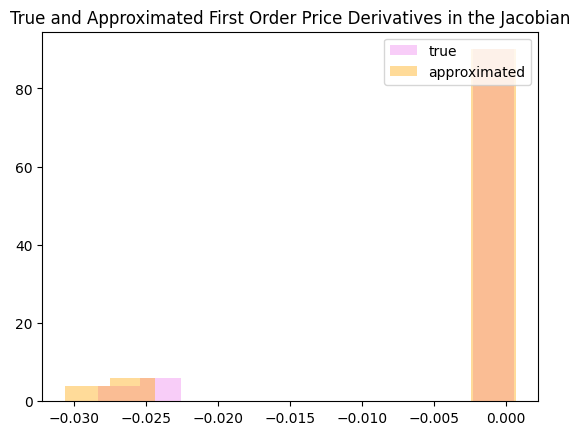

In [18]:
plt.hist(J_true_flat, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(J_approx_flat,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()

In [25]:
wage = 15 
theta_0 = 1
theta_L = 0.3 
theta_K = 0.7
q= np.ones(2)

productivity_shocks = np.ones((2,2))
capital = np.ones((2,2))

t = 0

MC = (wage*(1/theta_L))*((q)/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))**((1/theta_L)-1) *(1/(np.exp(theta_0 + productivity_shocks[:,t])*
              capital[:,t]**theta_K))

print(MC)

[0.06363169 0.06363169]


In [20]:
x = np.array([[1, 2, 3], [4, 5, 6]])
print(x.shape)

(2, 3)


In [21]:
n_cons = 3
n_firms = 3
product_chars = np.array(([1, 3, 3], [1, 2, 2], [5, 5, 5]))
mu = -4
omega = 0.5
v_p = np.array([4, 5, 6])
price = np.ones(n_firms)
beta = np.array([1, 0.5, 0.5])

mean_indirect_utility = product_chars@beta - mu*price

mean_indirect_utility_for_utility = np.repeat(mean_indirect_utility, n_cons, axis=0)

price_r = np.reshape(price, (1, n_firms))
alpha_i = np.reshape((omega*v_p), (n_cons, 1))



random_coeff = np.ravel((alpha_i@price_r).T)



u = mean_indirect_utility_for_utility  + random_coeff + e
print(u)

u_r = np.reshape(u, (n_firms, n_cons))
print(u_r)
sum_u = np.sum(np.exp(u_r), axis=0)
print(sum_u)

all_probs = np.exp(u_r)/(1 + sum_u)
print(all_probs)
market_shares = (np.sum(all_probs, axis=1))/n_cons
# # market_shares = np.sum(all_probs, axis=1)/self.n_consumers
p1 = all_probs[0, :]
print(p1)



[10.  10.5 11.   9.   9.5 10.  16.  16.5 17. ]
[[10.  10.5 11. ]
 [ 9.   9.5 10. ]
 [16.  16.5 17. ]]
[ 8916240.07023025 14700394.65845743 24236853.3610853 ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
[0.00247038 0.00247038 0.00247038]


In [22]:
J = np.zeros((n_firms, n_firms))
alphas = mu + omega*v_p
print(alphas)
print(all_probs)
for i in range(J.shape[0]):
    print('i', i)
    p1 = all_probs[i, :]
    for j in range(J.shape[1]):
        print('j', j)
        if i == j:
            J[i, j] = np.sum(alphas * p1 - alphas * (p1 ** 2))/(n_cons)
        else: 
            p2 = all_probs[j, :]
            print(p1)
            print(p2)
            print('check shape', -alphas * p1 * p2 )
            J[i, j] = np.sum((-alphas * p1 * p2))/(n_cons)

print(J)


[-2.  -1.5 -1. ]
[[2.47037576e-03 2.47037587e-03 2.47037593e-03]
 [9.08800453e-04 9.08800494e-04 9.08800518e-04]
 [9.96620712e-01 9.96620756e-01 9.96620782e-01]]
i 0
j 0
j 1
[0.00247038 0.00247038 0.00247038]
[0.0009088 0.0009088 0.0009088]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 2
[0.00247038 0.00247038 0.00247038]
[0.99662071 0.99662076 0.99662078]
check shape [0.00492406 0.00369304 0.00246203]
i 1
j 0
[0.0009088 0.0009088 0.0009088]
[0.00247038 0.00247038 0.00247038]
check shape [4.49015722e-06 3.36761821e-06 2.24507893e-06]
j 1
j 2
[0.0009088 0.0009088 0.0009088]
[0.99662071 0.99662076 0.99662078]
check shape [0.00181146 0.00135859 0.00090573]
i 2
j 0
[0.99662071 0.99662076 0.99662078]
[0.00247038 0.00247038 0.00247038]
check shape [0.00492406 0.00369304 0.00246203]
j 1
[0.99662071 0.99662076 0.99662078]
[0.0009088 0.0009088 0.0009088]
check shape [0.00181146 0.00135859 0.00090573]
j 2
[[-3.69640962e-03  3.36761812e-06  3.69304169e-03]
 [ 3.36761812e-06 -1.3619

In [23]:
a1, a2, a0, s0 = model.get_alphas()
print(a0)
print(s0)

-1.6820276496988864
0.33979778797685584


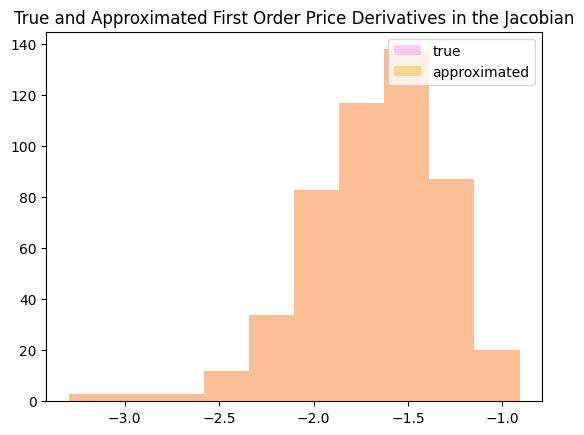

In [24]:
plt.hist(a1, 
         bins=10,
         alpha=0.4, 
         label='true',
         color='violet') # customized color parameter
  
plt.hist(a2,
         bins=10, 
         alpha=0.4,
         label='approximated',
         color='orange')

plt.title('True and Approximated First Order Price Derivatives in the Jacobian')
plt.legend(loc='upper right')
plt.show()